In [547]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [548]:
# layer norm
# i wanna see if the transformer can generalize on an "obvious" task btr if i override layernorm

In [549]:
class my_transformer(nn.Module):
    def __init__(self, embed_d=16):
        super().__init__()
        self.embed = nn.Linear(1,embed_d)
        self.layer = nn.TransformerEncoderLayer(embed_d,1, activation="relu", batch_first=True)
        self.transform = nn.TransformerEncoder(self.layer,1)
     #   self.layer.norm1 = nn.Identity()
#       self.layer.norm2 = nn.Identity()
        self.unembed = nn.Linear(embed_d,1)

    def forward(self, x):
        x = self.embed(x)
        x= self.transform(x)
        x= self.unembed(x)
        return x

In [550]:
x = torch.linspace(-10,10,100).unsqueeze(1).unsqueeze(1)

y = torch.sin(x)

x_train = x
y_train = y

#x_val = x[70:]
#y_val = y[70:]

train_dataset = torch.utils.data.TensorDataset(x_train,y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(x))
#val_dataset = torch.utils.data.TensorDataset(x_val,y_val)
#val_loader = torch.utils.data.DataLoader(val_dataset)

the_model = my_transformer()
optim = torch.optim.AdamW(the_model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()

In [ ]:
loss_list=[]

the_model.train()
for epochs in range(5000):
    
    losss=0
    for X_batch, Y_batch in train_loader:
        output = the_model(X_batch)
        loss = loss_fn(output,Y_batch)
        loss.backward()
        optim.step()
        losss+= loss
        optim.zero_grad()
    
    if epochs%100==0:
        print(losss)
    loss_list.append(loss.detach())


plt.plot(loss_list)  
plt.xscale("log")
plt.yscale("log")
plt.show()  
    

tensor(0.7514, grad_fn=<AddBackward0>)
tensor(0.4016, grad_fn=<AddBackward0>)
tensor(0.3586, grad_fn=<AddBackward0>)
tensor(0.3300, grad_fn=<AddBackward0>)
tensor(0.2493, grad_fn=<AddBackward0>)
tensor(0.2273, grad_fn=<AddBackward0>)
tensor(0.1811, grad_fn=<AddBackward0>)
tensor(0.1806, grad_fn=<AddBackward0>)
tensor(0.1780, grad_fn=<AddBackward0>)
tensor(0.1703, grad_fn=<AddBackward0>)
tensor(0.1495, grad_fn=<AddBackward0>)
tensor(0.1563, grad_fn=<AddBackward0>)
tensor(0.1461, grad_fn=<AddBackward0>)
tensor(0.1510, grad_fn=<AddBackward0>)
tensor(0.1325, grad_fn=<AddBackward0>)
tensor(0.1266, grad_fn=<AddBackward0>)
tensor(0.1232, grad_fn=<AddBackward0>)


In [ ]:
plt.show()

torch.Size([40])


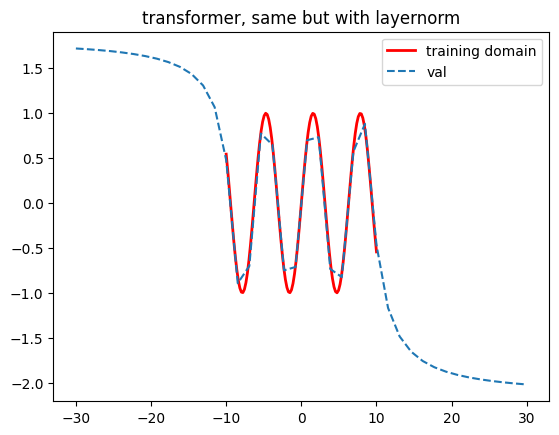

torch.Size([100, 1, 1])

In [ ]:
#title stuff
if isinstance(the_model.layer.norm1, nn.Identity):
    title = "transformer, no layernorm"
else:
    title= "transformer, same but with layernorm"



the_model.eval()
thing_to_test_on = torch.linspace(-30,30, 40)
print(thing_to_test_on.shape)
plt.plot(x.squeeze(),y.squeeze(),c="red", linewidth="2", label="training domain")
#plt.plot(x.squeeze(), the_model(x).squeeze().detach(), linestyle="dashed", label="val"  )

plt.plot(thing_to_test_on.squeeze(), the_model(thing_to_test_on.unsqueeze(1).unsqueeze(1)).squeeze().detach(), linestyle="dashed", label="val"  )
plt.title(title)
plt.legend()
plt.show()

x.shape